In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA, KernelPCA

In [2]:
# Reading the dataset
data = pd.read_csv('Train_UWu5bXk.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


array([[<Axes: title={'center': 'Item_Weight'}>,
        <Axes: title={'center': 'Item_Visibility'}>],
       [<Axes: title={'center': 'Item_MRP'}>,
        <Axes: title={'center': 'Outlet_Establishment_Year'}>],
       [<Axes: title={'center': 'Item_Outlet_Sales'}>, <Axes: >]],
      dtype=object)

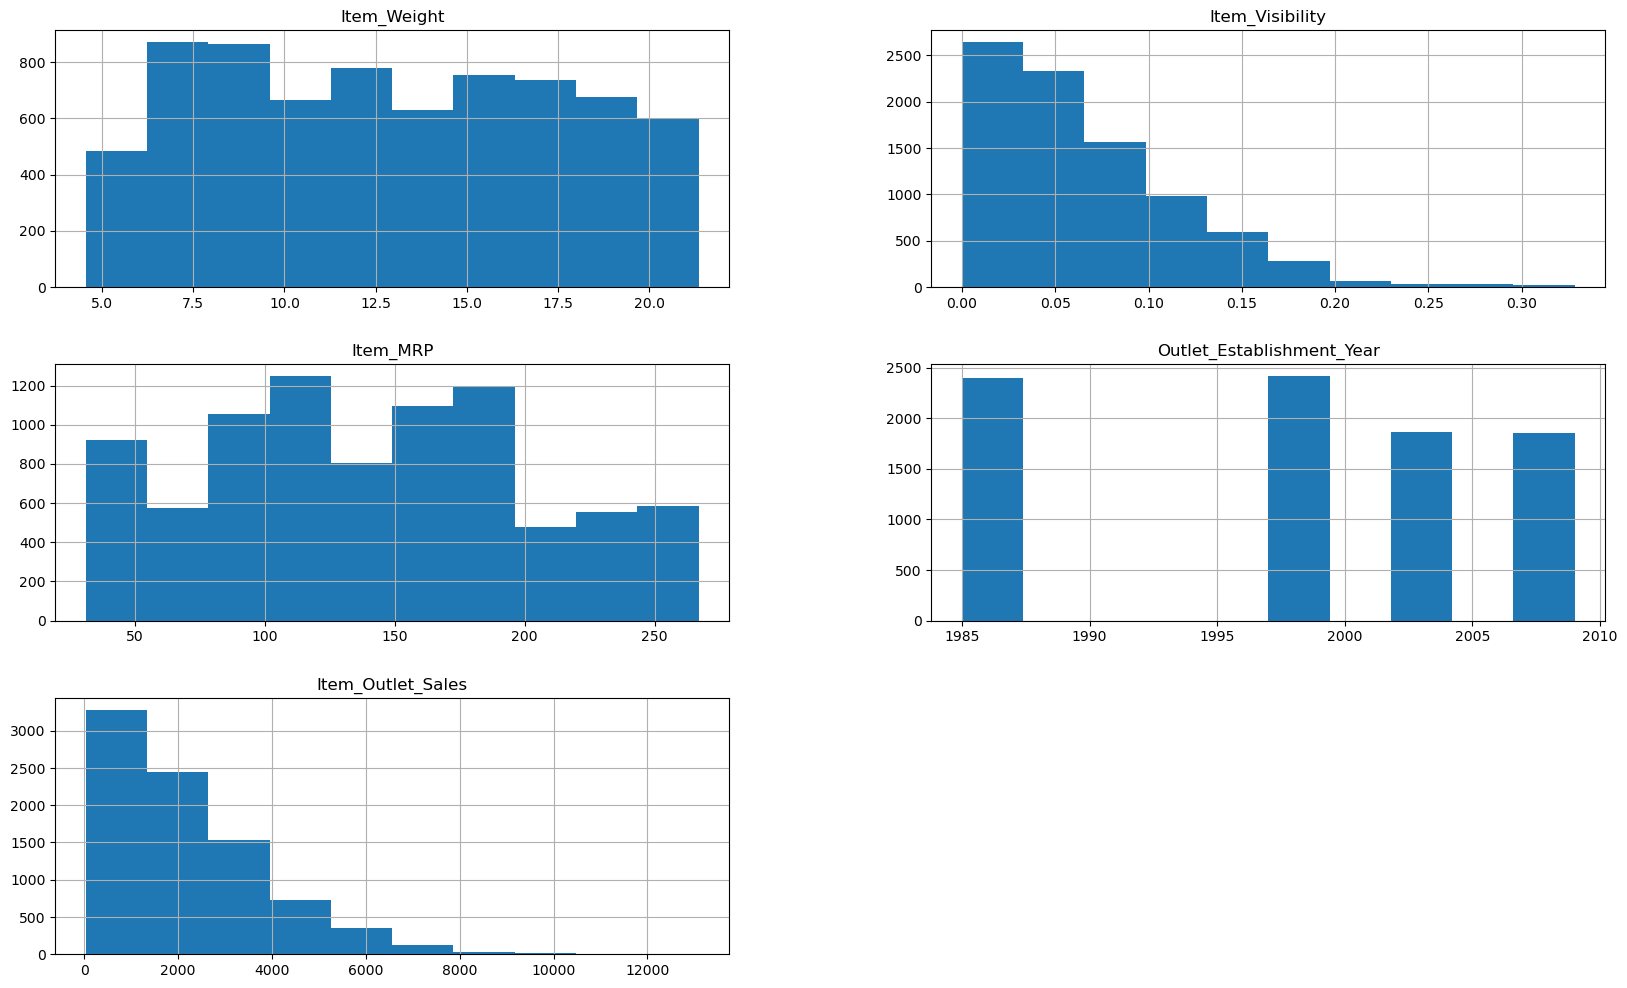

In [3]:
# Visualizing histograms of the dataset
data.hist(figsize=(20, 12))

In [4]:
# Applying PCA
pca = PCA(n_components=2)
X = data[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']]
X['Item_Weight'] = X['Item_Weight'].fillna(X['Item_Weight'].mean())
pca.fit(X)
X = pca.transform(X)
X

C:\Users\REZA\AppData\Local\Temp\ipykernel_20128\1007738882.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Item_Weight'] = X['Item_Weight'].fillna(X['Item_Weight'].mean())


array([[108.81103577,  -1.11472194],
       [-92.72746286, -11.27038581],
       [  0.63385467,  -1.14121579],
       ...,
       [-55.86986118,  -6.21878213],
       [-37.86137694, -11.22579548],
       [-65.52296662,   0.79853703]])

In [5]:
# Applying Kernel PCA
pca = KernelPCA(n_components=2)
X = data[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']]
X['Item_Weight'] = X['Item_Weight'].fillna(X['Item_Weight'].mean())
pca.fit(X)
X = pca.transform(X)
X

C:\Users\REZA\AppData\Local\Temp\ipykernel_20128\866855717.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Item_Weight'] = X['Item_Weight'].fillna(X['Item_Weight'].mean())


array([[108.81103577,  -1.11472194],
       [-92.72746286, -11.27038581],
       [  0.63385467,  -1.14121579],
       ...,
       [-55.86986118,  -6.21878213],
       [-37.86137694, -11.22579548],
       [-65.52296662,   0.79853703]])

In [6]:
# Importing necessary libraries
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
# Selecting the target variable
y = data['Item_Outlet_Sales']

In [8]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2323)

In [9]:
# Creating and fitting the CatBoostRegressor model
model = CatBoostRegressor(iterations=1000, learning_rate=0.05, depth=8, task_type='GPU', eval_metric='MAE')
model.fit(X_train, y_train, [], eval_set=(X_test, y_test), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 1330.9630788	test: 1292.0405913	best: 1292.0405913 (0)	total: 52ms	remaining: 52s
1:	total: 87.4ms	remaining: 43.6s
2:	total: 127ms	remaining: 42.3s
3:	total: 160ms	remaining: 39.8s
4:	total: 192ms	remaining: 38.3s
5:	learn: 1220.2144086	test: 1181.6968559	best: 1181.6968559 (5)	total: 232ms	remaining: 38.4s
6:	total: 272ms	remaining: 38.6s
7:	total: 308ms	remaining: 38.2s
8:	total: 344ms	remaining: 37.9s
9:	total: 379ms	remaining: 37.5s
10:	learn: 1128.4360138	test: 1095.0480995	best: 1095.0480995 (10)	total: 409ms	remaining: 36.8s
11:	total: 451ms	remaining: 37.2s
12:	total: 502ms	remaining: 38.1s
13:	total: 547ms	remaining: 38.5s
14:	total: 580ms	remaining: 38.1s
15:	learn: 1064.4347622	test: 1035.8328250	best: 1035.8328250 (15)	total: 614ms	remaining: 37.8s
16:	total: 648ms	remaining: 37.5s
17:	total: 681ms	remaining: 37.1s
18:	total: 718ms	remaining: 37.1s
19:	total: 755ms	remaining: 37s
20:	learn: 1022.2650188	test: 997.0927968	best: 997.0927968 (20)	total: 797ms	remain

In [10]:
# Standard deviation of the target variable
y.std()

1706.499615733832